In [6]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline

In [7]:
def B_converter(df):
    #Convert our incoming proxy value into an actual B value
    df['B'] = df['proxy']+np.pi*0.1*df['A']*-1

def A_selector(df,A):
    df_local = df[df.A == A]
    return df_local


In this first section we make use of a 5 x 5 x 5 box. This means that we have a density of 8 until the decreasing value of B causes density to rise, a divergence is excepted at the x=0 (or just beyond) as this is (by definition) the point at which

\begin{equation}
B = -A \frac{2 \pi r_{d}}{15}
\end{equation}

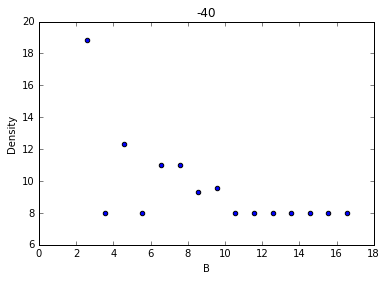

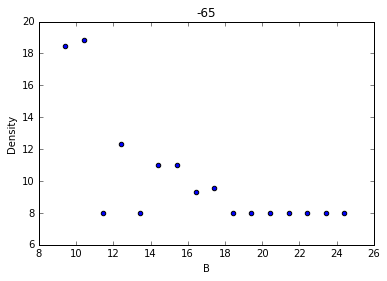

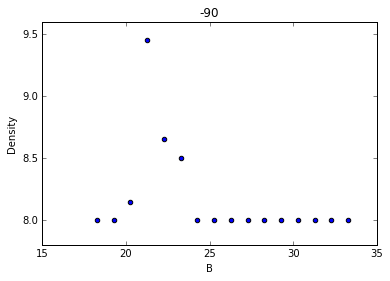

In [13]:
read_data = pd.read_csv('~/Documents/scripts/dpd/data/outpute1.txt',sep='\t',header=0,names=['A','proxy','d'])
read_data = read_data[read_data.A<0]
B_converter(read_data)

for A_value in [-40,-65,-90]:
    A_selected = A_selector(read_data,A_value)
    plt.scatter(A_selected['B'],A_selected['d'])
    plt.title(str(A_value))
    plt.xlabel('B')
    plt.ylabel('Density')
    plt.figure()

We now move over to a 22 x 5 x 5 box, which allows the full force of our previous work to be brought to the fore. The results are interesting.

In [9]:
def theoretical_density(df):
    df['td'] = 3.1 + -1.121*df.A*(df.B-1.136)**(-0.852)

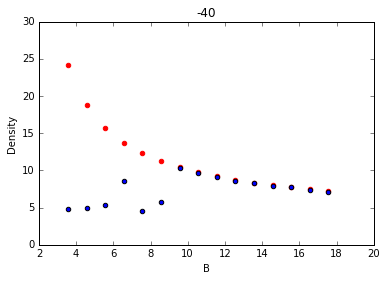

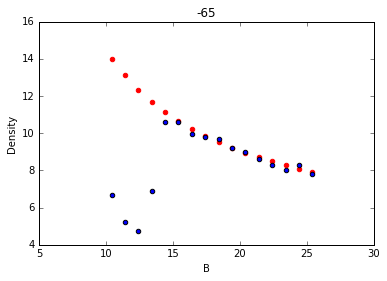

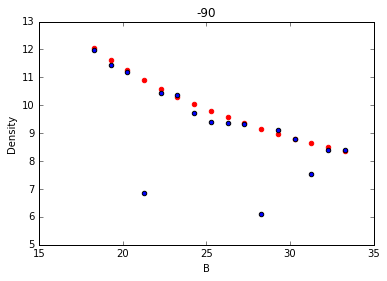

In [14]:
read_data = pd.read_csv('~/Documents/scripts/dpd/data/outpute2.txt',sep='\t',header=0,names=['A','proxy','d'])
read_data = read_data[read_data.A<0]
B_converter(read_data)
theoretical_density(read_data)


for A_value in [-40,-65,-90]:
    A_selected = A_selector(read_data,A_value)
    plt.scatter(A_selected['B'],A_selected['td'],color='r')
    plt.scatter(A_selected['B'],A_selected['d'])
    plt.title(str(A_value))
    plt.xlabel('B')
    plt.ylabel('Density')
    plt.figure()